# Baby Names Analysis
We and many of our friends had new babies recently so we and our friends, I think all young couples like us who are expecting a baby will do the same thing, really pay much attention on how to name the babies. Bellow I will use 2 data sets to analyse the popular baby names, trendy baby names and name neutrality as well as geography preference in name. I hope the analysis will help you a bit with choosing a name for baby. My baby has a trendy name!
The data are from Social Security Adminitration released on data.gov website. There are 2 data sets:
   1. National data: https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data
   2. By state data: https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-data-by-state-and-district-of-

National data has 1.92 million entries and by state data has 5.93 million entries.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from bokeh.io import  show, output_notebook#, output_file
from bokeh.plotting import figure
from bokeh.models import HoverTool, WheelZoomTool, PanTool, ColumnDataSource, LogColorMapper, LinearColorMapper
from bokeh.palettes import Viridis256 as palette
from wordcloud import WordCloud, STOPWORDS
palette.reverse()
output_notebook()

Loading BokehJS ...

## Read data and have first look at how the data tabulated

In [2]:
datsta = pd.read_csv('Name_by_State.csv')
datnat = pd.read_csv('Name_Nation.csv')
state_abbr = pd.read_csv('State_Abbr.csv')
population = pd.read_csv('US_Population_1990_2017.csv')

In [3]:
datsta.head()

,State,Gender,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [4]:
datnat.head()

,Gender,Year,Name,Count
0,F,1880,Mary,7065
1,F,1880,Anna,2604
2,F,1880,Emma,2003
3,F,1880,Elizabeth,1939
4,F,1880,Minnie,1746


## Popular name by year, all time and recently

In [5]:
# Group by 'Year' and 'Name', then normalized by number of baby each year to get percentages for each names.
ntop=10
popbyyearM = datnat[datnat['Gender']=='M'].groupby(['Year','Name']).sum()
popbyyearM = popbyyearM.groupby(level=0, group_keys=False).transform(lambda x: x/x.sum())
popbyyearM = popbyyearM.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(by='Count',ascending=False).head(ntop))['Count']
popbyyearF = datnat[datnat['Gender']=='F'].groupby(['Year','Name']).sum()
popbyyearF = popbyyearF.groupby(level=0, group_keys=False).transform(lambda x: x/x.sum())
popbyyearF = popbyyearF.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(by='Count',ascending=False).head(ntop))['Count']

In [6]:
pnamesM1 = []
pnamesM2 = []
pnamesF1 = []
pnamesF2 = []
for year in range(1880,2018):
    pnamesM1.append(popbyyearM[year].index.tolist()[0:5])
    pnamesM2.append(popbyyearM[year].index.tolist()[5:10])
    pnamesF1.append(popbyyearF[year].index.tolist()[0:5])
    pnamesF2.append(popbyyearF[year].index.tolist()[5:10])

x = [i-int(i/10)*10 for i in range(1880,2018)]
y = [int(i/10)*10 for i in range(1880,2018)]
source = ColumnDataSource(
    data=dict(
        X=x,
        Y=y,
        pnamesM1 = pnamesM1,
        pnamesM2 = pnamesM2,
        pnamesF1 = pnamesF1,
        pnamesF2 = pnamesF2
        )
    )
hover = hover = HoverTool(
    tooltips=[('Male', '@pnamesM1'),
              ('   ', '@pnamesM2'),
              ('Female', '@pnamesF1'),
              ('     ', '@pnamesF2'),
             ]
)

In [7]:
p = figure(title="Top 10 Popular Names by Each Year",  tools=[hover],
           toolbar_location="above", plot_width=450, plot_height=600)
p.square('X', 'Y', source=source, size=30, fill_alpha=0.4, line_alpha=0.4)
p.xaxis.ticker = [i for i in range(0,10)]
p.xaxis.axis_label= 'Year'
p.xaxis.axis_label_text_font_size='12pt'
p.yaxis.axis_label_text_font_size='12pt'
p.yaxis.axis_label= 'Decade'
tic = [i for i in range(1880,2020,10)]
dtic = {}
for i in tic:
    dtic[i] = str(i)+'s'
p.yaxis.ticker = tic
p.yaxis.major_label_overrides = dtic
p.xaxis.major_label_text_font_size='12pt'
p.yaxis.major_label_text_font_size='12pt'
print("Please click on each year for the top 10 popular names for each year")

#output_file('Pop_Name_by_Year.html')
show(p)

Please click on each year for the top 10 popular names for each year


In [10]:
def showname(popnames):
    names = popnames.sort_values(ascending=False).index.values
    freqs = popnames.sort_values(ascending=False).values
    words = {}
    max_words = 30 if names.size > 30 else names.size
    width = 1.5
    offset = 0.1
    for i in range(names.size):
        #words[names[i]] = (freqs[i]-freqs[max_words])/(freqs[0]-freqs[max_words])*width + offset
        words[names[i]] = freqs[i]/freqs[0]

    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(max_font_size=120,  background_color='white', max_words=max_words,
                          width=800, height=450, stopwords=stopwords)
    wordcloud.generate_from_frequencies(words)
    # Plotting
    plt.figure(figsize=(8,4.5))
    plt.axes([0.0, 0.0, 0.8, 1.0])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.axes([0.8, 0.15, 0.2, 0.70])
    max_words = 20 if names.size > 20 else names.size
    plt.text(0.2, 1, 'Order:', color='blue', alpha=0.7)
    for i in range(max_words):
        plt.text(0.2,(1-(i+1)/max_words),str(i+1)+'. '+names[i], color='blue', alpha=0.7)
    plt.axis("off")

    plt.show()

Top popular male names all time


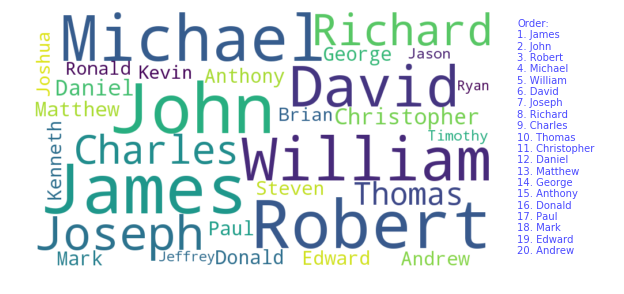


Top popular female names all time


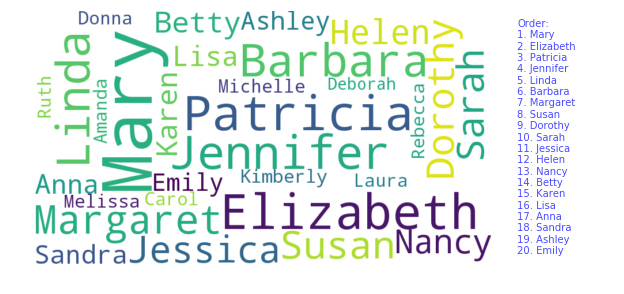

In [11]:
popalltime = datnat[datnat['Gender']=='M'].groupby(['Name']).sum()['Count']
popalltime = popalltime.apply(lambda x: x/popalltime.sum())
print("Top popular male names all time")
#print(popalltime.sort_values(ascending=False).head(10))
showname(popalltime)

popalltime = datnat[datnat['Gender']=='F'].groupby(['Name']).sum()['Count']
popalltime = popalltime.apply(lambda x: x/popalltime.sum())
print('')
print("Top popular female names all time")
#print(popalltime.sort_values(ascending=False).head(10))
showname(popalltime)

Top popular male names recently 5 years


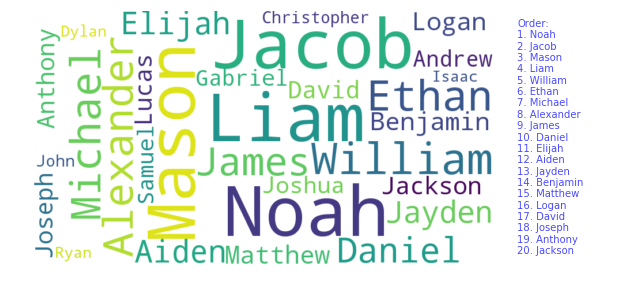

Top popular female names recently 5 years


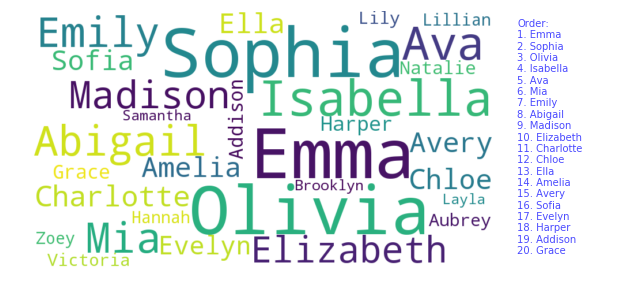

In [12]:
poprc = datnat[(datnat['Year'] > 2009) & (datnat['Gender']=='M')].groupby(['Name']).sum()['Count']
poprc = poprc.apply(lambda x: x/poprc.sum())
print("Top popular male names recently 5 years")
#print(poprc.sort_values(ascending=False).head(10))
showname(poprc)
poprc = datnat[(datnat['Year'] > 2009) & (datnat['Gender']=='F')].groupby(['Name']).sum()['Count']
poprc = poprc.apply(lambda x: x/poprc.sum())
print("Top popular female names recently 5 years")
#print(poprc.sort_values(ascending=False).head(10))
showname(poprc)

Male names having the most time in the top list:
Name
James      117
William    110
Robert     109
John       108
Charles     75
Michael     74
Joseph      70
Thomas      58
George      58
David       57
Name: Count, dtype: int64


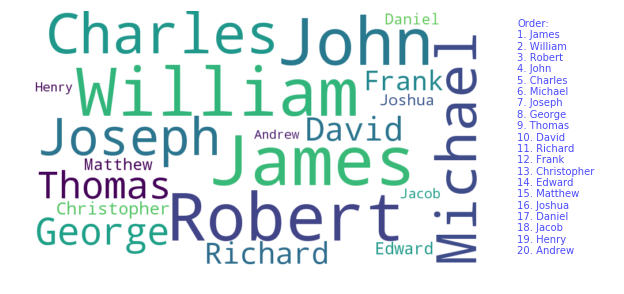

Female names having the most time in the top list:
Name
Mary         92
Elizabeth    73
Margaret     60
Helen        45
Anna         41
Ruth         39
Patricia     38
Dorothy      36
Emma         34
Barbara      32
Name: Count, dtype: int64


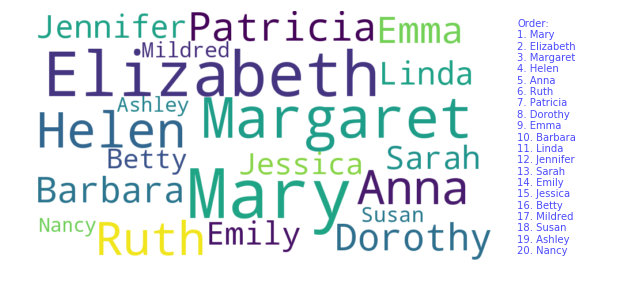

In [13]:
print('Male names having the most time in the top list:')
mpopnameM = popbyyearM.groupby(level=1, group_keys=False).count().sort_values(ascending=False).head(20)
print(mpopnameM.head(10))
showname(mpopnameM)
print('Female names having the most time in the top list:')
mpopnameF = popbyyearF.groupby(level=1, group_keys=False).count().sort_values(ascending=False).head(20)
print(mpopnameF.head(10))
showname(mpopnameF)
#datnat.groupby(['Name']).sum()['Count'].sort_values(ascending=False).head(20)

Some "classical" names such as James, John, Charles, Robert, Mary, Elizabeth, Linda, ... are the most popular names for all time. Amongst them some name like James, Robert, John are William are indeed very popular and never be unpopular when they are in the top list for more than 100 years. For female name, Mary is also a indeed popular name.
Recently new popular names are Jacob, Mason, Noah, Ethan for male and Sophia, Isabella, Olivia, Ava, Chloe. Some classical names are still in the top recent popular name are Michael, William, Emma, ...

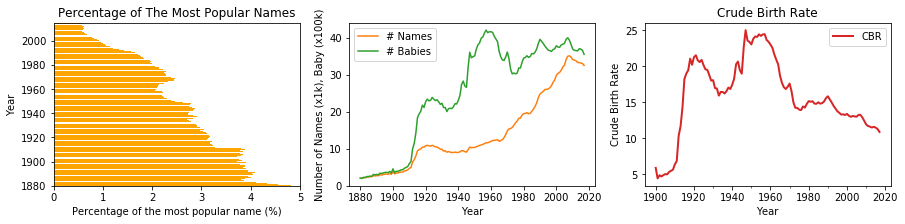

In [14]:
# How dominant the popular name, number of baby born and name used by year
popbyyear = datnat.groupby(['Year','Name']).sum()
popbyyear = popbyyear.groupby(level=0, group_keys=False).transform(lambda x: x/x.sum())
popbyyear = popbyyear.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(by='Count',ascending=False).head(ntop))['Count']
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
ax1.barh(popbyyear.index.levels[0], popbyyear.values[0::ntop]*100, color='orange')
ax1.set_title('Percentage of The Most Popular Names')
ax1.set_xlabel('Percentage of the most popular name (%)')
ax1.set_ylabel('Year')
ax1.set_xlim(0.0, 5.0)
ax1.set_ylim(1880, 2015)

tmp=datnat.groupby('Year').count()['Count'].apply(lambda x: x/1000)
ax2.plot(tmp.index, tmp.values, label='# Names', color='C1')
tmp=datnat.groupby('Year').sum()['Count'].apply(lambda x: x/100000)
ax2.plot(tmp.index, tmp.values, label='# Babies', color='C2')
ax2.legend()
ax2.set_label('Number of Babies and Names')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Names (x1k), Baby (x100k)')

#Crude birth rate (CBR) represents the childbirths per 1000 people. 
#The crude birth rate is considered "crude" because is ignores the age structure 
#of the population and it doesn't take into account who among the population 
#were actually able to give birth. US population data are from 1900 to 2017 only.
nbabyyear = datnat.groupby('Year').sum()['Count']
nbabyyear = nbabyyear[nbabyyear.index >= 1900]
# sorting in Year increasing order
population = population.sort_values(by='Year')
ax3.plot(nbabyyear.index, nbabyyear.values*1000/population['Population'].values, linewidth=2, color='C3', label='CBR')
tics = [i for i in range(1900, 2030, 20)]
mtics = [i for i in range(1930, 2020, 20)]
#ax3.set_xlim([1920,2020])
#ax3.set_ylim([1920,2020])
ax3.set_xticks(tics)
ax3.set_xticks(mtics, minor=True)
ax3.legend()
ax3.set_title("Crude Birth Rate")
ax3.set_xlabel('Year')
ax3.set_ylabel('Crude Birth Rate')
plt.show()

Number of different names increases very fast in comparison with the increase of number of baby. There are varition on the number of babies born each year but the number of name used each year is mostly constantly increasing. There is a plateau duing 30s to 40s decades and a decreasing during recently last 5 to 10 years. The fast increasing of baby name from 50 decades to now may be mainly due to the fast developments of communication and broadcasting technologies and internet. These technologies have enlarged people's name vocabulary since large amount of data are broadcasted everyday. The immigration may be also a reason for fast increasing of baby name. Many new names are brought to US from outside. With this fast increasing of baby names, the percentage of the most popular names now is 10 times smaller than that at begining of 20 century.
About the number of babies, there are several baby boom periods. The first one is about end of WWI. The 2nd one is about end of 50s and begining of 60s. The third one is about late 80s and the last one is aobut early 21st century. Someone is relating the baby boom with the increasing of housing price recently. They linked the housing buble in 2006 to the baby boom in 70s and last few year housing price rocketing to baby boom in 90s as the year gaps fitting well to the age people starting to have their own family and to buy their own houses.
The rigth figure show the crude birth rate from 1900 to now. The data around begining of 20th century may not be complete (below gender ratio show some more evident for that) so there is a huge jump around 1910. We will not focus on this bump. The plot shows that the birth rate is  is decreasing almost monotonically in last 30 year after the small bump at ~1990. This trend wourth to have a serious social investigation!!!

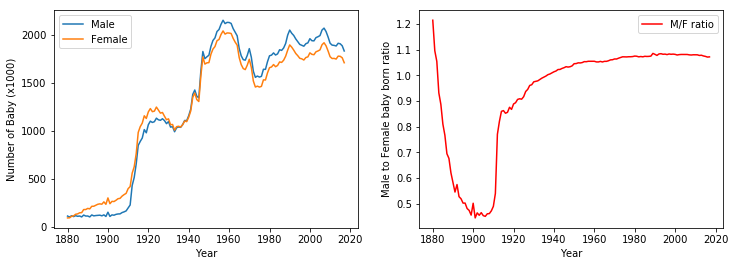

In [15]:
nbygender = datnat.groupby(['Gender','Year']).sum()['Count']
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))

ax1.plot(nbygender['M'].index, nbygender['M'].values/1000, label='Male')
ax1.plot(nbygender['F'].index, nbygender['F'].values/1000, label='Female')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Baby (x1000)')
ax1.legend()
ax2.plot(nbygender['F'].index, nbygender['M'].values/nbygender['F'].values, color='red', label='M/F ratio')
ax2.set_xlabel('Year')
ax2.set_ylabel('Male to Female baby born ratio')
ax2.legend()
plt.show()

There was a time the Male to Female ratio is extremely low, ~ 1900. It could be due to the incompletion in collecting data. This incompletion also could be the reason for the first baby boom! If we consider only the M/F ratio after 1920, as the number of baby is large enough to assuming a good statistic and completion of data collection, the M/F ration is increasing from 0.87 to saturated value of ~ 1.08 from 90s decade to now.

## Trendy names
Let's find the names increasing their portions the most recently.
Linear regression (by sklearn package) will be use to estimate the increasing speed of each name to find the most trending name recently.

In [16]:
namenow = datnat[(datnat['Year']==2017) & (datnat['Gender']=='M')].groupby('Name').sum()
namenow = namenow[namenow['Count'] > 5000]['Count']
namenowM = namenow.index.tolist()
namenow = datnat[(datnat['Year']==2017) & (datnat['Gender']=='F')].groupby('Name').sum()
namenow = namenow[namenow['Count'] > 5000]['Count']
namenowF = namenow.index.tolist()

recentpop = datnat[datnat['Year'] > 2012].groupby(['Year','Name']).sum()
recentpop = recentpop.groupby(level=0, group_keys=False).transform(lambda x: x/x.sum())
recentpop = recentpop.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(by='Count', ascending=False))['Count']

In [17]:
# Using a simple linear regression to find which name having the largest increasing slopes.
model = linear_model.LinearRegression()
slopdictM={}
for name in namenowM:
    tmp = recentpop[:,name]
    nsample = tmp.size
    X = tmp.index.values.reshape(nsample,1)
    Y = tmp.values.reshape(nsample,1)
    model.fit(X, Y)
    slopdictM[name] = model.coef_[0][0]
    
slopdictF={}
for name in namenowF:
    tmp = recentpop[:,name]
    nsample = tmp.size
    X = tmp.index.values.reshape(nsample,1)
    Y = tmp.values.reshape(nsample,1)
    model.fit(X, Y)
    slopdictF[name] = model.coef_[0][0]

The most trending male names:


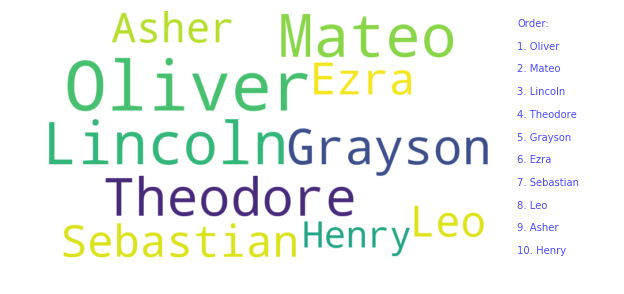

The most trending female names:


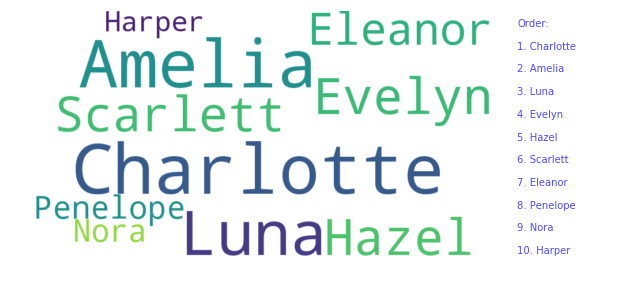

In [18]:
print('The most trending male names:')
#print(pd.Series(slopdictM).sort_values(ascending=False).head(10))
showname(pd.Series(slopdictM).sort_values(ascending=False).head(10))
print('The most trending female names:')
#print(pd.Series(slopdictF).sort_values(ascending=False).head(10))
showname(pd.Series(slopdictF).sort_values(ascending=False).head(10))

# Geography analysis

In [19]:
# Popular names of each state whole time and recently for Male and Female
popname = datsta[(datsta['Year'] > 2012) & (datsta['Gender']=='M')].groupby(['State','Name']).sum()
popname = popname.groupby(level=0, group_keys=False).transform(lambda x: x/x.sum())
popnameMrc = popname.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(by='Count', ascending=False).head(5))['Count']
popname = datsta[datsta['Gender']=='M'].groupby(['State','Name']).sum()
popname = popname.groupby(level=0, group_keys=False).transform(lambda x: x/x.sum())
popnameM = popname.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(by='Count', ascending=False).head(5))['Count']

popname = datsta[(datsta['Year'] > 2012) & (datsta['Gender']=='F')].groupby(['State','Name']).sum()
popname = popname.groupby(level=0, group_keys=False).transform(lambda x: x/x.sum())
popnameFrc = popname.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(by='Count', ascending=False).head(5))['Count']
popname = datsta[datsta['Gender']=='F'].groupby(['State','Name']).sum()
popname = popname.groupby(level=0, group_keys=False).transform(lambda x: x/x.sum())
popnameF = popname.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(by='Count', ascending=False).head(5))['Count']

popname = datsta.groupby(['State','Name']).sum()
numbaby = popname.groupby(level=0, group_keys=False).sum()['Count']

In [20]:
# Relocate and scale patch of state
def relocateandscale(lons, lats, newpos, scale):
    lons = np.array(lons)
    for i in range(lons.size):
        if lons[i] > 0:
            lons[i] -= 360
    lats = np.array(lats)
    clon = np.nanmean(lons)
    clat = np.nanmean(lats)
    lons = lons - clon
    lats = lats - clat
    lons = (lons*scale + newpos[0])
    lats = (lats*scale + newpos[1])
    return (lons, lats)    

# Preparing to plot 51 states on map with moved AK and HI
stlist = popname.index.levels[0].tolist()
#Temporarily revmove AK and HI
stlist.remove('AK')
stlist.remove('HI')

from bokeh.sampledata import us_states
us_states = us_states.data.copy()
state_xs = [us_states[code]["lons"] for code in stlist]
state_ys = [us_states[code]["lats"] for code in stlist]

# Moving and scaling AK and HI
newpos = [-106, 26.5]
lons = us_states['HI']['lons']
lats = us_states['HI']['lats']
(lons, lats) = relocateandscale(lons, lats, newpos, 0.2)
stlist.append('HI')
state_xs.append(lons.tolist())
state_ys.append(lats.tolist())

newpos = [-120, 26.5]
lons = us_states['AK']['lons']
lats = us_states['AK']['lats']
(lons, lats) = relocateandscale(lons, lats, newpos, 0.2)
stlist.append('AK')
state_xs.append(lons.tolist())
state_ys.append(lats.tolist())

# dividing line for HI and AK
hiline_x = [-110, -110, -103.5, -103.5, -110]
hiline_y = [25, 28, 28, 25, 25]
akline_x = [-124, -124, -111.5, -111.5, -124]
akline_y = [25, 30, 30, 25, 25]

In [21]:
state_abbr_dic = {}
for i in range(state_abbr.shape[0]):
    state_abbr_dic[state_abbr.iloc[i]['Abbreviation']] = state_abbr.iloc[i]['State'].title()
stlist_by_name = []
for state in stlist:
    stlist_by_name.append(state_abbr_dic[state])
nbaby = []
for state in stlist:
    nbaby.append(numbaby[state])
pnamesM = []
for state in stlist:
    pnamesM.append(popnameM[state].index.tolist())
pnamesMrc = []
for state in stlist:
    pnamesMrc.append(popnameMrc[state].index.tolist())
pnamesF = []
for state in stlist:
    pnamesF.append(popnameF[state].index.tolist())
pnamesFrc = []
for state in stlist:
    pnamesFrc.append(popnameFrc[state].index.tolist())

source = ColumnDataSource(
    data=dict(
        X=state_xs,
        Y=state_ys,
        pnamesM=pnamesM,
        pnamesMrc=pnamesMrc,
        pnamesF=pnamesF,
        pnamesFrc=pnamesFrc,
        state=stlist_by_name,
        nbaby=nbaby
        )
    )
hover = HoverTool(
    tooltips=[('State','@state'),
              ('Recent 5y: Male', '@pnamesMrc'),
              ('Recent 5y: Female', '@pnamesFrc'),
              ('All time: Male','@pnamesM'),              
              ('All time: Female','@pnamesF'),
             ]
)
color_mapper = LogColorMapper(palette=palette)
#color_mapper = LinearColorMapper(palette=palette)
# init figure
p = figure(title="Most Popular Names in Each State Recently and All Time", tools=[hover],
           toolbar_location="above", plot_width=825, plot_height=525)
# Fill each state with number of baby
p.patches('X', 'Y', source=source,fill_alpha=0.5, line_color="#884444", line_width=1.5,
         fill_color={'field':'nbaby', 'transform': color_mapper})
p.line(akline_x, akline_y, line_color='black', line_dash = (6,3))
p.line(hiline_x, hiline_y, line_color='black', line_dash = (6,3))

# output to static HTML file
#output_file("PopularNamesbyStates.html")

# show results
print("Please click on each state to see the popular names of each state. The state color represent the number of baby born in that state.")
show(p)

Please click on each state to see the popular names of each state. The state color represent the number of baby born in that state.


# Name neutrality
We will find out which name is mostly exclusive for male or female and which name is used equally for both. First we will define name neutrality as the indicator for that. Zero will be no gender preference, -1 will be female exclusive and 1 will be male exclusive.

In [22]:
def nameneutrality(df):
    if 'M' not in df.index:
        nn = -1
    elif 'F' not in df.index:
        nn = 1
    else:
        nn = (df['M'] - df['F'])/(df['M'] + df['F'])
    return nn

In [23]:
allname = datnat.groupby('Name').sum()['Count']
# exclude some too unique/weird names which have been named for less than 1000 babies in more than 100 years
allname = allname[allname >= 1000].index.tolist()
groupname = datnat.groupby(['Name','Gender']).sum()['Count']
nameneu = {}
for name in allname:
    nameneu[name] = nameneutrality(groupname[name])
nndf = pd.Series(nameneu)

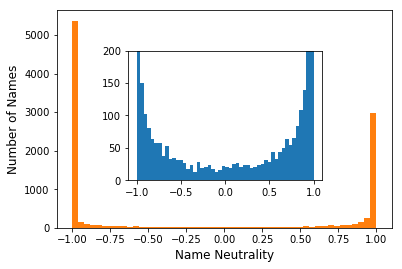

In [24]:
fig = plt.figure(figsize=(6,4))
plt.hist(nndf.values, bins=50,color='C1')
plt.xlabel('Name Neutrality', fontsize=12)
plt.ylabel('Number of Names', fontsize=12)
a = plt.axes([0.29,0.29,0.45,0.45])
plt.hist(nndf.values, bins=50,color='C0')
plt.ylim(0,200)
plt.show()

There are large number of names exclusively for male or female as shown by 2 very high bars at -1 and 1. There are move exclusive name for female that that for male, about 1.7 times.
The number of names being used for both male and female are decent, especially around +/- 0.8. And there is about ~20 name of almost zero neurality.

In [25]:
print('The Most Femalely Names:')
nndf[nndf<-0.95].sort_values(ascending=True).head(20)

The Most Femalely Names:


Aadhya     -1.0
Lucina     -1.0
Lucrecia   -1.0
Lucretia   -1.0
Luetta     -1.0
Lulu       -1.0
Lupita     -1.0
Lurline    -1.0
Luvenia    -1.0
Lyanna     -1.0
Lyla       -1.0
Lylah      -1.0
Lynae      -1.0
Lyndee     -1.0
Lyndi      -1.0
Lyndia     -1.0
Lyndsay    -1.0
Lyndsi     -1.0
Macee      -1.0
Macayla    -1.0
dtype: float64

In [26]:
print('The Most Malely Names:')
nndf[nndf > 0.95].sort_values(ascending=False).head(20)

The Most Malely Names:


Zev          1.0
Durward      1.0
Lauro        1.0
Durrell      1.0
Durell       1.0
Lawerence    1.0
Lawernce     1.0
Lawrance     1.0
Durand       1.0
Lawton       1.0
Lawyer       1.0
Lazaro       1.0
Lazarus      1.0
Leamon       1.0
Duran        1.0
Leandro      1.0
Lebron       1.0
Ledger       1.0
Duke         1.0
Leeroy       1.0
dtype: float64

In [27]:
print('Gender neutral Names:')
nndf[(nndf < 0.02) & (nndf > -0.02)]

Gender neutral Names:


Arlyn      0.012702
Ashten    -0.002693
Baby       0.017324
Blair      0.009594
Cameran    0.013172
Delane    -0.010188
Elisha    -0.009989
Han        0.018767
Joell     -0.006849
Kailen     0.002950
Kendel    -0.012094
Kerry      0.010822
Kris       0.017909
Michal    -0.007301
Ocean      0.000000
Ricci      0.019860
Salem      0.016334
Teagen    -0.018809
Terryl     0.015786
Unknown   -0.005822
Waverly   -0.004065
dtype: float64